# SAC Pendulum

In [1]:
import gymnasium as gym
import torch.nn as nn

from rlforge.agents.policy_gradient import SACAgent
from rlforge.experiments import ExperimentRunner

In [8]:
num_envs = 8
envs = gym.make_vec("Pendulum-v1", num_envs=num_envs, vectorization_mode="async")

agent = SACAgent(
    state_dim=envs.observation_space.shape[1],
    action_dim=envs.action_space.shape[1],
    policy_net_architecture=(64, 64), 
    q_net_architecture=(64, 64),  
    actor_lr=3e-3,
    critic_lr=3e-3,
    alpha_lr=3e-3,
    discount=0.99,        
    tau=0.005,          
    update_frequency=10,   
    buffer_size=1000000,
    mini_batch_size=256,  
    update_start_size=256, 
    tanh_squash=True,
    action_low=envs.action_space.low[0],
    action_high=envs.action_space.high[0],
    target_entropy_factor=0.9,
    device="cpu"
)

In [11]:
runner = ExperimentRunner(envs, agent)

results = runner.run_episodic_batch(
    num_runs=1,
    num_episodes=1500,
    max_steps_per_episode=None
)

rewards = results["rewards"]

runner.summary(last_n=20)

 Experiment Summary (Episodic)
Runs: 1
Average runtime per run: 236.788 seconds
Episodes per run (Max): 1500
First episode mean reward: -1494.867
Last episode mean reward: -128.630
Overall mean reward: -472.005
Mean reward (last 20 episodes): -171.640
First episode mean steps: 200.0
Last episode mean steps: 201.0
Overall mean steps: 201.0


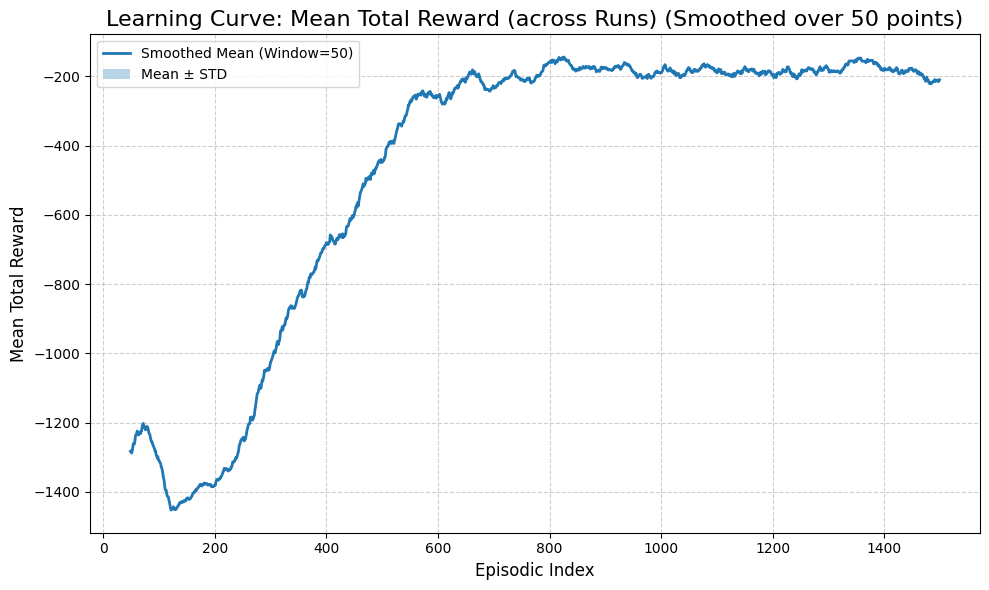

In [12]:
runner.plot_results()